<a href="https://colab.research.google.com/github/JaeMin-1/Numerical-analysis/blob/main/%EC%88%98%EC%B9%98%ED%95%B4%EC%84%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

주제: 대한민국의 연령별 기대여명 예측하기

In [ ]:
기존에 존재하는 연령별 기대여명 데이터 자료를 이용하여 선형회귀를 실습해보고,
이를 통해 기대여명을 예측해보자
자료 출처:https://kosis.kr/statisticsList/statisticsListIndex.do?menuId=M_01_01&vwcd=MT_ZTITLE&parmTabId=M_01_01&outLink=Y&entrType=#content-group

대한민국 0세~80세의 기대여명 데이터 자료를 읽어와 출력한다.

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
import csv
import pandas as pd

data = pd.read_csv('연령별 기대여명.csv', encoding='cp949')
data

입력받은 자료를 바탕으로 데이터 셋을 만든다.

In [ ]:
x_data = data["연령별"]
y_data = data["기대여명"]
data_set = []
for i in np.arange(len(x_data)) :
  data_set.append([x_data[i], y_data[i]])
data_set

In [ ]:
#한국어 폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


데이터 자료 시각화

In [ ]:

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15,10))
plt.xlabel('연령', fontsize=15)
plt.ylabel('기대여명', fontsize=15)
plt.xlim(0,80)
plt.ylim(0,90)
plt.plot(x_data, y_data, 'ro', markersize = 3)
plt.show()

polyfit()을 통한 선형회귀

In [ ]:
p1= np.polyfit(x_data, y_data,1)
plt.figure(figsize=(15,10))
plt.plot(x_data, y_data, 'ro')
plt.xlabel('연령', fontsize=15)
plt.ylabel('기대여명', fontsize=15)
plt.xlim(0,80)
plt.ylim(0,90)
plt.plot(x_data,np.polyval(p1,x_data), 'b--')
plt.grid()

오차제곱 계산 함수

In [ ]:
def mse (x, t, w) :
  y = w[0] * x + w[1] 
  mse = np.mean((y-t)**2)
  return mse

In [ ]:
p1 = np.polyfit(x_data, y_data,1)
print("직선의 기울기: ", p1[0], "y절편: ", p1[1])

직선의 기울기:  -0.9378319783197836 y절편:  82.45401987353208


In [ ]:
X = np.array([x_data])
Y = np.array([y_data])
e = mse(X, Y,[-0.93783198, 82.45401987])
print("제곱 오차 값: ", e)

제곱 오차 값:  0.5150546354846318


85세 기대여명 예측

In [ ]:
print("85세 기대여명:", (p1[0]*85+p1[1]))

85세 기대여명: 2.7383017163504633


텐서플로우를 통한 선형회귀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# 텐서플로우 2.0 환경에서 1.x 코드 실행하기
print(tf.__version__)

def Data_Draw(x_data, y_data):
    plt.plot(x_data, y_data,'ro')
    plt.ylim([0,100])
    plt.xlim([0,25])
    plt.xlabel('x')
    plt.ylabel('y')
    #plt.legend()
    plt.show()


def Data_Learning(x_data, y_data):
    W = tf.Variable(tf.random_uniform([1], -1.0, 0))
    # init = tf.initialize_all_variables()
    # sess = tf.Session()
    # sess.run(init)
    # sess.run(W)
    # print('sess.run(W)= ', sess.run(W))
    # array([0.05211711], dtype=float32)

    b = tf.Variable(tf.random_uniform([1], 80,85))
    # sess.run(b)
    # array([0.], dtype=float32)

    y = W * x_data + b
    # sess.run(y)
    # print(np.round(sess.run(y),1))

    loss = tf.reduce_mean(tf.square(y - y_data))
    # print(np.round(sess.run(loss),1))
    optimizer = tf.train.GradientDescentOptimizer(0.00001)

    train = optimizer.minimize(loss)

    init = tf.initialize_all_variables()
    sess = tf.Session()
    sess.run(init)
    count=0;
    while(count<100000):
        sess.run(train)
        count+=1
        if count%10000 ==0:
          print(count, sess.run(W), sess.run(b))
          print(count, sess.run(loss))
          plt.plot(x_data, y_data, 'ro')
          plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
          plt.xlabel('x')
          plt.ylabel('y')
          plt.show()


if __name__ == '__main__':
    Data_Draw(x_data, y_data)
    Data_Learning(x_data, y_data)

In [ ]:
print("85세 기대여명:",-0.92719823*85+81.88338)

85세 기대여명: 3.0715304499999974


그리드 서치

In [ ]:
X = np.array([x_data])
Y = np.array([y_data])
m = len(X)

W = tf.placeholder(tf.float32)
hypothesis = W*X+y_data[0]
cost = tf.reduce_sum(tf.pow(hypothesis-Y, 2)) / m

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

W_val, cost_val = [], []

for i in range(-200,0):
    xPos = i*0.01                      
    yPos = sess.run(cost, feed_dict={W:xPos})
    print('{:1.2f}, {:1.2f}'.format(xPos, yPos))
    W_val.append(xPos)
    cost_val.append(yPos)
plt.rc('axes', unicode_minus=False)
plt.plot(W_val, cost_val)
plt.title("손실함수")
plt.xlabel('W')
plt.ylabel('cost')
plt.grid()
plt.show()

In [ ]:
W0 = -0.95 # 손실함수값이 최소일때의 W0
W1 = y_data[0] #y절편값
p1= np.polyfit(x_data, y_data,1)
plt.figure(figsize=(15,10))
plt.plot(x_data, y_data, 'ro')
plt.xlabel('연령', fontsize=15)
plt.ylabel('기대여명', fontsize=15)
plt.xlim(0,80)
plt.ylim(0,90)
plt.plot(x_data,W0*x_data+W1 , 'b-')

In [ ]:
print("85세 기대여명:",-0.95*85+83.3)

85세 기대여명: 2.549999999999997


손실함수 3차원 시각화

In [ ]:
X = np.array([x_data])
Y = np.array([y_data])
m = len(X)
xn = 100
w0 = [-8, 8] 
w1 = [70, 90] 
x0 = np.linspace(w0[0], w0[1], xn)
x1 = np.linspace(w1[0], w1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
  for i1 in range(xn):
    J[i1, i0] = mse(X, Y, (x0[i0],x1[i1]))
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1,1,1,projection= '3d')
ax.plot_surface(xx0,xx1,J,rstride = 10, cstride = 10, alpha =0.3, color = 'blue', edgecolor = 'black')
ax.set_xlabel("W0",fontsize = 20)
ax.set_ylabel("W1",fontsize = 20)
ax.set_zlabel("오차함수 값 ", fontsize = 20)

plt.rc('axes', unicode_minus=False)


In [ ]:
#경사하강법
def fit_line(x, t) :
  w_init = [-0.1, 83]
  mu = 0.00001
  i_max = 1000000 
  eps = 0.1 
  w_i = np.zeros([i_max , 2])
  w_i[0, :] = w_init
  for i in range(1, i_max) :
    df = dmse(x, t, w_i[i-1])
    w_i[i, 0] = w_i[i -1, 0] - mu *df[0] 
    w_i[i, 1] = w_i[i -1, 1] - mu *df[1]
    if max(np.absolute(df)) < eps :
      break
  w0 = w_i[i, 0]
  w1 = w_i[i, 1]
  w_i = w_i[:i ,:]
  return w0, w1, df, w_i

#손실함수 기울기
def dmse(x,t,w) :
  y = w[0] * x + w[1]
  d_w0 = 2* np.mean((y-t) * x) 
  d_w1 = 2* np.mean(y-t)
  return d_w0, d_w1

In [ ]:
plt.figure(figsize=(10, 10))
xn = 100
x0 = np.linspace(w0[0], w0[1], xn)
x1 = np.linspace(w1[0], w1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn) :
  for i1 in range(xn) :
    J[i1, i0] = mse(X, Y, (x0[i0], x1[i1]))
cont = plt.contour(xx0,xx1,J,30,colors = 'black', levels = [50, 150, 250, 350])
cont.clabel(fmt='%1.0f', fontsize = 8)
plt.grid(True)

W0, W1, dMSE, W_history = fit_line(X, Y)

levels=np.logspace(-1, 2, 10)
plt.contourf(xx0, xx1, J, alpha=0.2, levels=levels)
plt.contour(xx0, xx1, J, colors="gray",levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(-0.94, 82.5, 'bo', markersize=10)
print('반복 횟수 {0}'.format(W_history.shape[0]))
print("기울기: {0:.6f}, y절편: {1:.6f}". format(W0,W1))
print("직선의 방정식:  y = {0:.6f}*x + {1:.6f}".format(W0,W1) )
print("오차 제곱: {0:.10f}".format(mse(X, Y, [W0, W1])))
plt.plot(W_history[:,0], W_history[:, 1], '.-', color = 'gray', markersize = 5, markeredgecolor = 'red')





plt.xlim(-1,-0.875)
plt.ylim(77,85)
plt.show()


In [ ]:
print("85세 기대여명:", -0.941492*85 + 82.650428)

85세 기대여명: 2.6236080000000044


사이킷런

In [ ]:
import sklearn.linear_model
from mpl_toolkits.mplot3d import Axes3D
x = data[['연령별']]
y = data['기대여명']
model = sklearn.linear_model.LinearRegression ()
model.fit(x, y_data)
W0 = model.coef_[0]
W1 = model.intercept_
print("기울기: {0:.6f}, y절편: {1:.6f}". format(W0,W1))
print("직선의 방정식:  y = {0:.6f}*x + {1:.6f}".format(W0,W1) )
print("오차 제곱: {0:.10f}".format(mse(X, Y, [W0, W1])))
plt.figure(figsize=(20,10))
plt.plot(x_data,y_data, 'ro', markersize = 5)
plt.ylim([0,100])
plt.xlim([0,80])
plt.xlabel('연령',fontsize=30)
plt.ylabel('기대여명',fontsize=30)
plt.plot(x_data, W0 * x_data + W1,'b-')
plt.show()

In [ ]:
print("85세 기대여명:", -0.937832*85 + 82.454020)

85세 기대여명: 2.7382999999999953


AA 조합

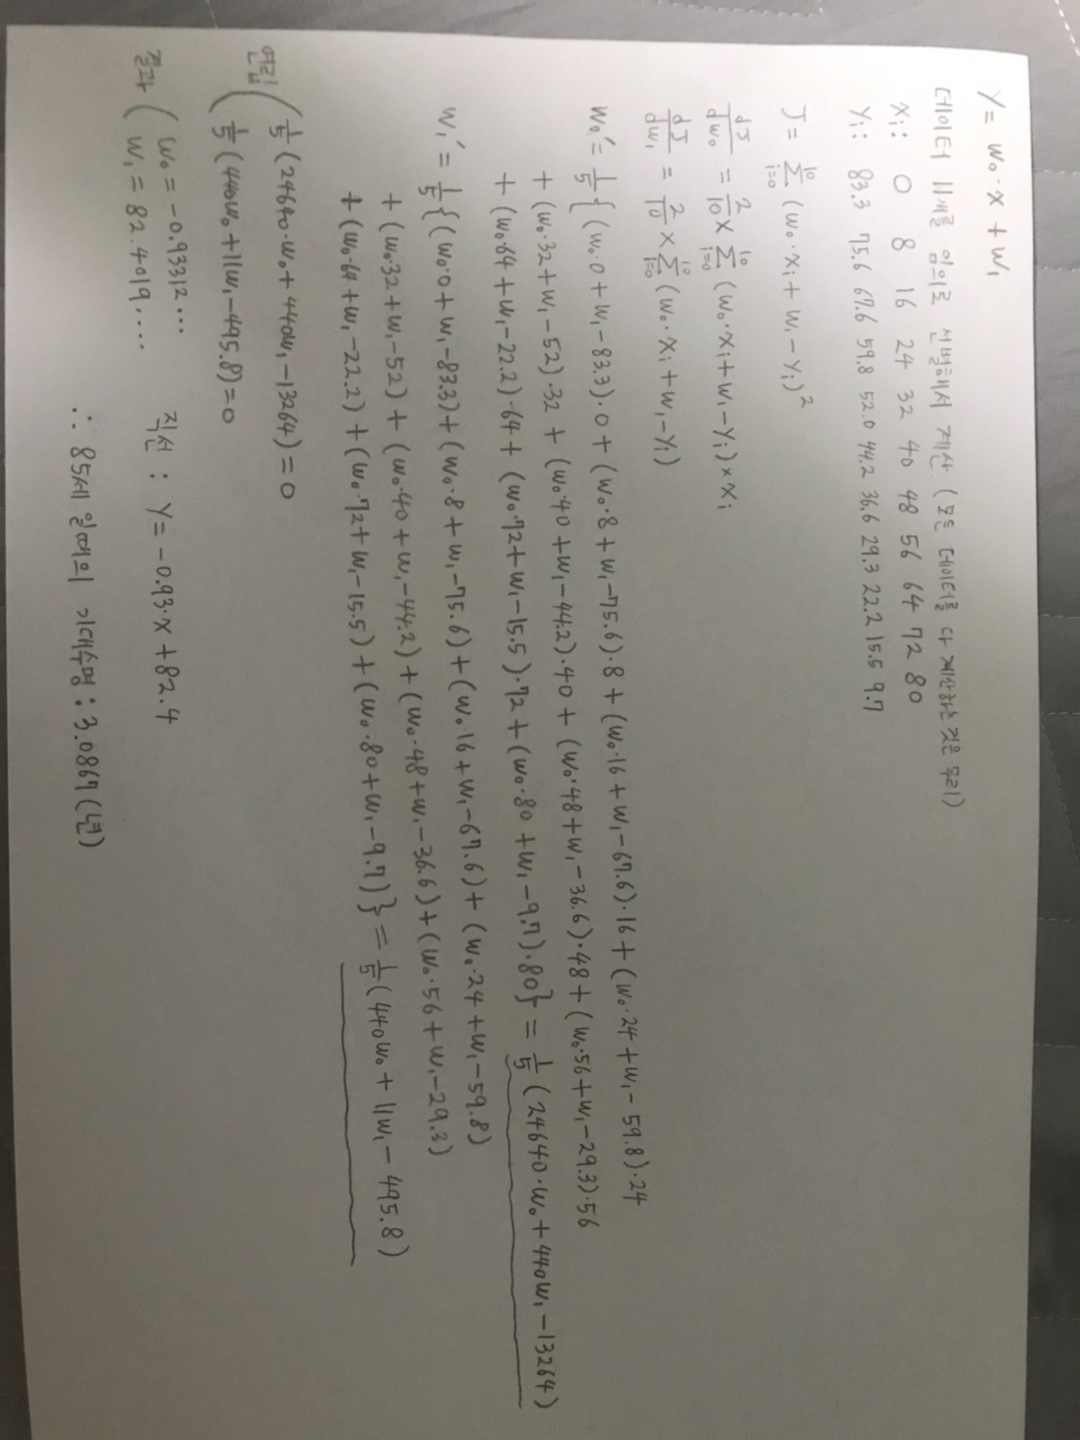

총 결과

polyfit() : 2.7383017163504775

텐서플로우 : 2.3008860500000026

그리드 서치 : 2.549999999999997

경사하강 법 : 2.6236080000000044

사이킷 런 : 2.7382999999999953 

AA조합 : 3.0867